<h1 style="color:cornflowerblue">Objectives</h1>
<p>For this case, consider that the current company is releasing a new vehicle (minivan), the company wants to get information on its best target public.</p>
<p>This study aims on the segmentation of the clients database for personalized marketing campaigns.</p>
<p>The segmentation seeks to obtain the "desires and needs" of these groups of customers.</p>
<p>Also, checking the if the evaluation of the product is related do demographic information, and if so, what group of clients should be the target of this product.</p>


<h1 style="color:cornflowerblue">Importing Libraries</h1>

In [1]:
# System
import os

# Data Manipulation
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [2]:
# Configuring Pandas
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Cientific notation to float.

# Seaborn Style
sns.set_style("darkgrid")

# Seaborn palette
sns.set_palette("dark")

# Seaborn paletter as HEX
seaborn_palette = sns.color_palette("dark").as_hex()

# Setting plotly colors
pio.templates["seaborn"] = go.layout.Template(layout=go.Layout(
    colorway=seaborn_palette
))

# Setting plotly standard theme
pio.templates.default = "seaborn"

<h1 style="color:cornflowerblue">Dataframe</h1>

In [3]:
# Importing data
df0 = pd.read_csv("./data/microvan.csv")
df0.head()

,subjnumb,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
0,1,4,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4,34,59,14,1,0,1,3
1,2,6,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5,36,79,16,1,0,3,4
2,3,3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6,51,72,22,2,1,3,3
3,4,3,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3,32,42,12,0,0,3,2
4,5,1,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5,40,75,17,1,1,3,4


In [4]:
# Checking Columns
df0.columns

Index(['subjnumb', 'mvliking', 'kidtrans', 'miniboxy', 'lthrbetr', 'secbiggr',
       'safeimpt', 'buyhghnd', 'pricqual', 'prmsound', 'perfimpt', 'tkvacatn',
       'noparkrm', 'homlrgst', 'envrminr', 'needbetw', 'suvcmpct', 'next2str',
       'carefmny', 'shdcarpl', 'imprtapp', 'lk4whldr', 'kidsbulk', 'wntguzlr',
       'nordtrps', 'stylclth', 'strngwrn', 'passnimp', 'twoincom', 'nohummer',
       'aftrschl', 'accesfun', 'age', 'income', 'miles', 'numkids', 'female',
       'educ', 'recycle'],
      dtype='object')

In [5]:
# Checking Dataframe shape
df0.shape

(400, 39)

In [6]:
# Checking values
for i in df0.columns:
    print(df0[i].value_counts(dropna=False))
    print("\n")

subjnumb
400    1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
361    1
362    1
363    1
364    1
365    1
366    1
367    1
368    1
353    1
354    1
355    1
356    1
357    1
358    1
359    1
360    1
345    1
346    1
347    1
348    1
349    1
350    1
351    1
352    1
337    1
338    1
339    1
340    1
341    1
342    1
343    1
344    1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
65     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
105    1
106    1
107    1
108    1
109    1
110    1
111    1
112    1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
81     1
82     1
83     1
84     1
85     1
86     1
8

<h2 style="color:cornflowerblue">Columns and Stored Data</h2>
<p>The Dataframe is based on the answers of possible clients on the concept of a new product.</p>
<p>The subjnumb columns refers to the subjected answer and will become the index of the dataframe;</p>
<p>Except for the demographic columns (age, income, miles, numkids, female, educ and recycle), they all are ordinal answers from 1 to 9. For the sake of understanding what each column represents, a dictionary of values will be created.</p>

In [7]:
# Dictionary of data

data_dict = {
    "subjnumb": "Respondee Identifier",
    "mvliking": "General evaluation of the product concept. From 1 to 9",
    "kidtrans": "Evaluation of the need to transport kids. From 1 to 9",
    "miniboxy": "Evaluation of space and design. From 1 to 9",
    "lthrbetr": "Evaluation of leather over cloth materials. From 1 to 9",
    "secbiggr": "Evaluation of the need of vehicle bigger than a regular SUV. From 1 to 9",
    "safeimpt": "Evaluation of the importance of safety. From 1 to 9",
    "buyhghnd": "Evaluation of the need of more sophisticated vehicle. From 1 to 9",
    "pricqual": "Evaluation of price on quality. From 1 to 9",
    "prmsound": "Evaluation of the need of premmium sound/entertainment systems on cars. From 1 to 9",
    "perfimpt": "Evaluation of the performance impact. From 1 to 9",
    "tkvacatn": "Evaluation of importance of vacations. From 1 to 9",
    "noparkrm": "Evaluation of residential area for parking. From 1 to 9",
    "homlrgst": "Evaluation of how big the house is in the neighborhood. From 1 to 9",
    "envrminr": "Evaluation of lesser enviromental impact of vehicles. From 1 to 9",
    "needbetw": "Evaluation of the need for something between SUV and Minivan. From 1 to 9",
    "suvcmpct": "Evaluation of how much better SUVs are from Minivans. From 1 to 9",
    "next2str": "Evaluation of those that want their next car with only 2 seats. From 1 to 9",
    "carefmny": "Evaluation of how careful with spending money. From 1 to 9",
    "shdcarpl": "Evaluation of how much public transportation or lifts should be used. From 1 to 9",
    "imprtapp": "Evaluation of the number of imported products. From 1 to 9",
    "lk4whldr": "Evaluation of the desire for 4x4. From 1 to 9",
    "kidsbulk": "Evaluation of the necessity of carrying volume. From 1 to 9",
    "wntguzlr": "Evaluation of how much is bought out of desire. From 1 to 9",
    "nordtrps": "Evaluation of how often family trips are made. From 1 to 9",
    "stylclth": "Evaluation of how great the expenses with cloths are. From 1 to 9",
    "strngwrn": "Evaluation of guarantee, with a new car. From 1 to 9",
    "passnimp": "Evaluation of passion for the job is greater than the paycheck. From 1 to 9",
    "twoincom": "Evaluation of the necessity of more than 1 sorce of income. From 1 to 9",
    "nohummer": "Evaluation of not interested in SUV. From 1 to 9",
    "aftrschl": "Evaluation of after school activities. From 1 to 9",
    "accesfun": "Evaluation of the importance of accessories . From 1 to 9",
    "age": "Age of the respondent",
    "income": "Annual family income",
    "miles": "Annual miles driven",
    "numkids": "Number of children in the house (0-18 years)",
    "female": "If is female (0:No, 1:Yes)",
    "educ": "Educational level: 1=High School, 2=University, 3=Graduation, 4=Post-Graduation",
    "recycle": "Average recycling (1=Much Less, 2=Little Less, 3=Average, 4=Littel More, 5=Lot More)"
}

In [8]:
# Setting the dataframe with the respondee identifier
df0 = df0.set_index("subjnumb")
df0.head()

,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
subjnumb,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4,34,59,14,1,0,1,3
2,6,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5,36,79,16,1,0,3,4
3,3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6,51,72,22,2,1,3,3
4,3,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3,32,42,12,0,0,3,2
5,1,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5,40,75,17,1,1,3,4


In [9]:
# Demographic keys list
dem_keys_list = ["age", "income", "miles", "numkids", "female", "educ", "recycle"]


# Product keys list
product_keys_list = [keys for keys in data_dict.keys() if keys not in dem_keys_list]
product_keys_list.remove("subjnumb")
product_keys_list

['mvliking',
 'kidtrans',
 'miniboxy',
 'lthrbetr',
 'secbiggr',
 'safeimpt',
 'buyhghnd',
 'pricqual',
 'prmsound',
 'perfimpt',
 'tkvacatn',
 'noparkrm',
 'homlrgst',
 'envrminr',
 'needbetw',
 'suvcmpct',
 'next2str',
 'carefmny',
 'shdcarpl',
 'imprtapp',
 'lk4whldr',
 'kidsbulk',
 'wntguzlr',
 'nordtrps',
 'stylclth',
 'strngwrn',
 'passnimp',
 'twoincom',
 'nohummer',
 'aftrschl',
 'accesfun']

In [10]:
# Dataframe data types
df0.dtypes

mvliking    int64
kidtrans    int64
miniboxy    int64
lthrbetr    int64
secbiggr    int64
safeimpt    int64
buyhghnd    int64
pricqual    int64
prmsound    int64
perfimpt    int64
tkvacatn    int64
noparkrm    int64
homlrgst    int64
envrminr    int64
needbetw    int64
suvcmpct    int64
next2str    int64
carefmny    int64
shdcarpl    int64
imprtapp    int64
lk4whldr    int64
kidsbulk    int64
wntguzlr    int64
nordtrps    int64
stylclth    int64
strngwrn    int64
passnimp    int64
twoincom    int64
nohummer    int64
aftrschl    int64
accesfun    int64
age         int64
income      int64
miles       int64
numkids     int64
female      int64
educ        int64
recycle     int64
dtype: object

In [11]:
# Checking for missing data
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1 to 400
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   mvliking  400 non-null    int64
 1   kidtrans  400 non-null    int64
 2   miniboxy  400 non-null    int64
 3   lthrbetr  400 non-null    int64
 4   secbiggr  400 non-null    int64
 5   safeimpt  400 non-null    int64
 6   buyhghnd  400 non-null    int64
 7   pricqual  400 non-null    int64
 8   prmsound  400 non-null    int64
 9   perfimpt  400 non-null    int64
 10  tkvacatn  400 non-null    int64
 11  noparkrm  400 non-null    int64
 12  homlrgst  400 non-null    int64
 13  envrminr  400 non-null    int64
 14  needbetw  400 non-null    int64
 15  suvcmpct  400 non-null    int64
 16  next2str  400 non-null    int64
 17  carefmny  400 non-null    int64
 18  shdcarpl  400 non-null    int64
 19  imprtapp  400 non-null    int64
 20  lk4whldr  400 non-null    int64
 21  kidsbulk  400 non-null    int64
 22  wntguzl

<h1 style="color:cornflowerblue">Basic Statistics</h1>

In [12]:
# Dataframe Basic Statistics
df0.describe()

,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,4.84,4.83,4.67,4.25,5.23,5.00,5.28,4.96,4.72,5.00,4.44,4.58,5.49,5.53,4.94,4.78,4.49,5.22,5.17,4.56,5.24,4.48,5.06,5.32,5.34,5.04,5.62,4.87,4.85,4.38,4.64,40.05,71.28,18.04,1.22,0.54,2.81,3.04
std,2.69,1.52,1.48,1.52,1.51,1.51,1.54,1.52,1.51,1.49,1.53,1.52,1.50,1.52,1.55,1.51,1.55,1.53,1.50,1.50,1.46,1.48,1.51,1.49,1.53,1.50,1.51,1.56,1.54,1.51,1.52,8.57,43.28,4.86,1.08,0.50,0.93,1.18
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,19.00,15.00,7.00,0.00,0.00,1.00,1.00
25%,3.00,4.00,4.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,3.00,5.00,5.00,4.00,4.00,3.00,4.00,4.00,3.00,4.00,3.75,4.00,4.00,4.00,4.00,5.00,4.00,4.00,3.00,3.00,34.00,36.00,15.00,0.00,0.00,2.00,2.00
50%,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,5.00,6.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,6.00,5.00,5.00,4.00,5.00,40.00,62.50,18.00,1.00,1.00,3.00,3.00
75%,7.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00,6.00,6.00,5.25,6.00,7.00,7.00,6.00,6.00,6.00,7.00,6.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00,7.00,6.00,6.00,5.00,6.00,46.00,96.00,21.00,2.00,1.00,3.00,4.00
max,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,60.00,273.00,32.00,4.00,1.00,4.00,5.00


<h1 style="color:cornflowerblue">Dimension Reduction - PCA</h1>
<p>Must verify how many components will be used (the smallst amount of features that will explaing most of the variance)</p>

In [13]:
# checking for number of features
for i in range(1,10):
    pca = PCA(n_components=i, random_state=42).fit(df0.drop(dem_keys_list+["mvliking"], axis=1))
    print(f'{i} components with total variance explanied as: {sum(pca.explained_variance_ratio_)}: {pca.explained_variance_ratio_}')


1 components with total variance explanied as: 0.27696709879672443: [0.2769671]
2 components with total variance explanied as: 0.4445767750017477: [0.2769671  0.16760968]
3 components with total variance explanied as: 0.5459459552274871: [0.2769671  0.16760968 0.10136918]
4 components with total variance explanied as: 0.6342464490894243: [0.2769671  0.16760968 0.10136918 0.08830049]
5 components with total variance explanied as: 0.6949209280291695: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448]
6 components with total variance explanied as: 0.7163695796236541: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865]
7 components with total variance explanied as: 0.7356422840632015: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865
 0.0192727 ]
8 components with total variance explanied as: 0.7538737884378807: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865
 0.0192727  0.0182315 ]
9 components with total variance explanied as: 0.7

<h2 style="color:cornflowerblue">PCA - Results</h2>
<p>5 components will be used, as they explains around 70% of all data.</p>

In [14]:
# Instancing PCA with the chosen components
pca = PCA(n_components=5, random_state=42).fit(df0.drop(dem_keys_list+["mvliking"], axis=1))
print(f'5 components with total variance explanied as: {sum(pca.explained_variance_ratio_)}: {pca.explained_variance_ratio_}')

5 components with total variance explanied as: 0.6949209280291695: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448]


In [15]:
# Dataframe of the chosen componentes with the respective values for each feature
df_components = pd.DataFrame(columns=df0.drop(columns = dem_keys_list+["mvliking"], axis = 1).columns)

for i in range(5):
    df_components.loc[i] = pca.components_[i]

df_components

,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun
0,-0.15,-0.03,-0.28,0.01,-0.07,-0.25,-0.19,-0.26,0.03,-0.29,-0.04,-0.16,0.17,-0.04,-0.06,-0.07,0.29,-0.17,-0.25,-0.11,-0.16,0.21,0.13,-0.26,-0.14,0.27,-0.20,-0.02,-0.15,-0.29
1,-0.00,0.36,-0.08,0.34,0.00,0.08,-0.08,-0.01,-0.01,-0.01,0.36,-0.30,-0.02,0.35,0.36,-0.34,-0.07,-0.01,-0.01,-0.01,0.01,0.01,-0.04,0.11,-0.13,-0.01,0.06,0.32,-0.05,-0.01
2,0.37,-0.05,-0.04,0.01,0.30,-0.07,-0.10,-0.06,-0.31,-0.08,0.02,-0.04,0.27,-0.00,0.08,0.02,0.06,-0.23,0.05,0.22,0.29,0.23,-0.34,-0.11,0.20,-0.01,-0.08,0.05,0.37,-0.05
3,-0.31,0.07,-0.03,-0.04,0.44,0.06,0.02,0.01,-0.42,-0.04,0.00,0.00,-0.11,0.05,-0.05,-0.07,-0.01,0.13,0.02,0.42,-0.25,-0.05,0.26,-0.03,0.34,0.11,0.08,0.02,-0.18,-0.07
4,0.13,-0.03,-0.08,0.07,0.03,-0.30,-0.42,-0.08,-0.08,0.05,-0.11,0.07,-0.41,-0.02,0.04,-0.17,0.09,0.42,0.07,0.03,0.12,-0.29,-0.16,0.04,-0.03,0.03,-0.39,-0.03,0.02,-0.01


In [16]:
# Min / Max values of each component
for i in range(df_components.shape[0]):
    print(f"Component {i}:")
    print(f"{data_dict[df_components.columns[df_components.loc[i].argmax()]]}: {df_components.loc[i].max()}")
    print(f"{data_dict[df_components.columns[df_components.loc[i].argmin()]]}: {df_components.loc[i].min()}")
    print("\n")

Component 0:
Evaluation of how careful with spending money. From 1 to 9: 0.2919282078756139
Evaluation of importance of vacations. From 1 to 9: -0.2881680286409765


Component 1:
Evaluation of space and design. From 1 to 9: 0.364988113753255
Evaluation of those that want their next car with only 2 seats. From 1 to 9: -0.338353633018781


Component 2:
Evaluation of after school activities. From 1 to 9: 0.36654076139075215
Evaluation of how often family trips are made. From 1 to 9: -0.3442915373005912


Component 3:
Evaluation of the importance of safety. From 1 to 9: 0.4437741425570385
Evaluation of the performance impact. From 1 to 9: -0.4171369128111632


Component 4:
Evaluation of how much public transportation or lifts should be used. From 1 to 9: 0.41988733417793417
Evaluation of price on quality. From 1 to 9: -0.4195434922872864




In [17]:
# Dataframe for the correlation of components
corr_mat = df_components.stack().reset_index()
corr_mat.columns=["component", "feature", "correlation"]
corr_mat["component"] = corr_mat["component"].astype(str)

corr_mat["abs_correlation"] = abs(corr_mat["correlation"])
corr_mat.head()

,component,feature,correlation,abs_correlation
0,0,kidtrans,-0.15,0.15
1,0,miniboxy,-0.03,0.03
2,0,lthrbetr,-0.28,0.28
3,0,secbiggr,0.01,0.01
4,0,safeimpt,-0.07,0.07


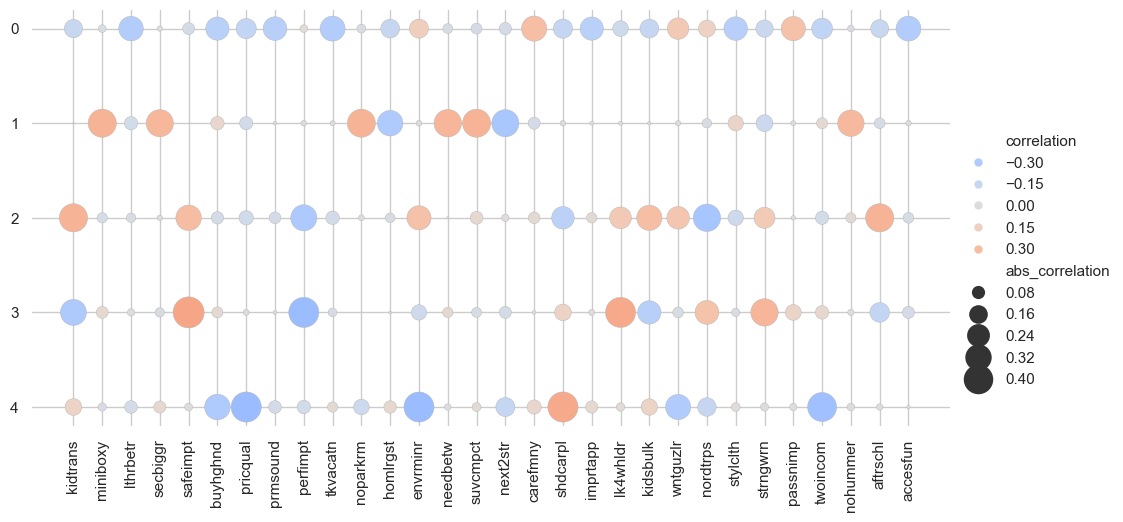

In [18]:
# Heatmap for graphic analysis of Principal Components
sns.set_theme(style="whitegrid")
heatm = sns.relplot(data=corr_mat, x="feature", y="component", 
                    hue="correlation", size="abs_correlation", palette="coolwarm",
                    hue_norm=(-1,1), edgecolor=".7", height=5, aspect=2, sizes=(0,500))

heatm.set(xlabel="", ylabel="", )
heatm.despine(left=True, bottom=True)

for i in heatm.axes.flat:
    i.set_xticks(i.get_xticks())
    i.set_xticklabels(i.get_xticklabels(), rotation=90)

<h2 style="color:cornflowerblue">Naming Components</h2>
<p> for better separation of components, each will have a specific name that better reflects on the correlation of the features</p>
<p>
    <ul type="disc">
    <li>Component 0: Vacationless Cheapskate
    <li>Component 1: Small & New
    <li>Component 2: Family Guy
    <li>Component 3: FastnFurious
    <li>Component 4: High End
    </ul></p>
<p>Naming is just an example of how to proper identify the groups of clients and their needs.</p>

<h2 style="color:cornflowerblue">PCA Storing</h2>

In [19]:
# Creating a dataframe of the Principal Components

df_PCA = pca.transform(df0.drop(dem_keys_list+["mvliking"], axis=1))

df_PCA

array([[ 4.95739724,  0.630778  ,  0.25397408, -4.53413096, -0.4787577 ],
       [-0.42529226,  4.57730748, -2.68257259,  2.62292284,  0.50422577],
       [-4.20223653, -5.99835902,  2.46455968, -1.54782301,  2.41202492],
       ...,
       [-6.4115679 ,  4.47822563, -6.6555251 ,  0.29161379,  1.62472682],
       [-3.57270499,  5.5292335 ,  0.25267482, -2.61167859,  1.04362801],
       [ 4.05034892, -2.45977589,  3.75878157,  0.49039215, -0.74268315]])

In [20]:
df_PCA.shape

(400, 5)

In [21]:
# Dataframe of the PCA with the components names
names_PCA = ["VacationlessCheapskate","Small&New","FamilyGuy","FastnFurious","HighEnd"]

df_PCA = pd.DataFrame(data=df_PCA, columns = names_PCA, index=df0.index)

df_PCA.head()

,VacationlessCheapskate,Small&New,FamilyGuy,FastnFurious,HighEnd
subjnumb,,,,,
1,4.96,0.63,0.25,-4.53,-0.48
2,-0.43,4.58,-2.68,2.62,0.50
3,-4.20,-6.00,2.46,-1.55,2.41
4,4.89,0.93,-0.76,3.58,-3.52
5,0.12,-5.55,-1.02,-0.07,0.84


In [22]:
# Dataframe with the demographic information added
dfcomp = pd.concat([df_PCA, df0.loc[:, dem_keys_list+["mvliking"]]], axis=1)
dfcomp.head()

,VacationlessCheapskate,Small&New,FamilyGuy,FastnFurious,HighEnd,age,income,miles,numkids,female,educ,recycle,mvliking
subjnumb,,,,,,,,,,,,,
1,4.96,0.63,0.25,-4.53,-0.48,34,59,14,1,0,1,3,4
2,-0.43,4.58,-2.68,2.62,0.50,36,79,16,1,0,3,4,6
3,-4.20,-6.00,2.46,-1.55,2.41,51,72,22,2,1,3,3,3
4,4.89,0.93,-0.76,3.58,-3.52,32,42,12,0,0,3,2,3
5,0.12,-5.55,-1.02,-0.07,0.84,40,75,17,1,1,3,4,1


<h2 style="color:cornflowerblue">PCA Conclusion</h2>
<p>PCA is a powerful tool to aggregate featrues and help simplify analysis. This project will continue in a separate project for prediction of buying the new product (vehicle).</P>

<p>After replacing the features with 5 principal components that explain about 70% of the data, the new features were named and a new dataframe was created.</p>

<p>The new dataframe contains the 5 new features (as results from PCA) and the demographic information of each client.</p>


<h1 style="color:cornflowerblue">Clustering Client Base</h1>
<p>The goal is to create clusters of clients, based on the new features.</p>

<h2 style="color:cornflowerblue">Clustering - Elbow Method</h2>

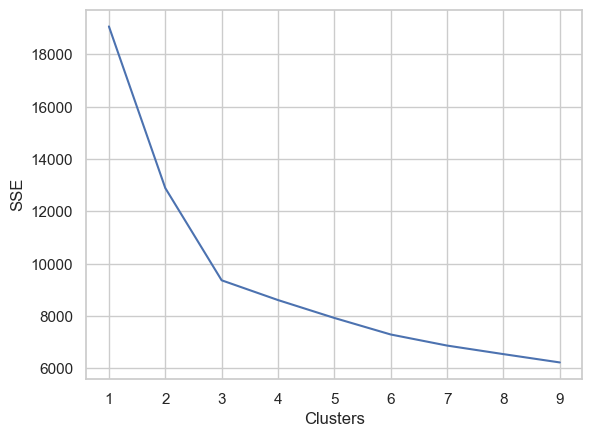

In [23]:
# Using the Sum of Squared Error as metric to choose the number of clusters
sse = {}

for k in range(1,10):
    # Separating the base in clusters
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42, n_init=10).fit(dfcomp.loc[:, names_PCA])

    # Sum of the distances between observations
    sse[k] = kmeans.inertia_

# Creating plot for visualization of clusters for the elbow method
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Clusters")
plt.ylabel("SSE")
plt.show()

In [24]:
# Using 3 clusters as seen in the previous graphic
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=42, n_init=10).fit(dfcomp.loc[:, names_PCA])


# Adding a column with to inform the cluster of each client
dfcomp["cluster"] = kmeans.labels_

dfcomp.head()

,VacationlessCheapskate,Small&New,FamilyGuy,FastnFurious,HighEnd,age,income,miles,numkids,female,educ,recycle,mvliking,cluster
subjnumb,,,,,,,,,,,,,,
1,4.96,0.63,0.25,-4.53,-0.48,34,59,14,1,0,1,3,4,0
2,-0.43,4.58,-2.68,2.62,0.50,36,79,16,1,0,3,4,6,2
3,-4.20,-6.00,2.46,-1.55,2.41,51,72,22,2,1,3,3,3,1
4,4.89,0.93,-0.76,3.58,-3.52,32,42,12,0,0,3,2,3,0
5,0.12,-5.55,-1.02,-0.07,0.84,40,75,17,1,1,3,4,1,1


In [25]:
# Dataframe of each cluster centroid
df_kcentroid = pd.DataFrame(data=kmeans.cluster_centers_, columns=names_PCA)
df_kcentroid

,VacationlessCheapskate,Small&New,FamilyGuy,FastnFurious,HighEnd
0,4.82,0.17,0.26,0.08,0.04
1,-2.91,-3.73,-0.33,-0.13,-0.14
2,-3.49,3.91,0.00,0.03,0.10


In [26]:
# Checking cluster 0
cluster0 = dfcomp.loc[dfcomp["cluster"] == 0]
cluster0.head()

,VacationlessCheapskate,Small&New,FamilyGuy,FastnFurious,HighEnd,age,income,miles,numkids,female,educ,recycle,mvliking,cluster
subjnumb,,,,,,,,,,,,,,
1,4.96,0.63,0.25,-4.53,-0.48,34,59,14,1,0,1,3,4,0
4,4.89,0.93,-0.76,3.58,-3.52,32,42,12,0,0,3,2,3,0
8,4.29,1.27,2.10,2.66,-0.53,29,39,16,1,0,2,2,4,0
10,8.11,-1.87,-1.86,1.12,0.59,26,26,11,0,0,2,3,3,0
11,5.16,2.38,2.59,3.28,-0.27,31,20,12,0,1,3,3,1,0


In [27]:
# Checking cluster 0 Statistics
cluster0.describe()

,VacationlessCheapskate,Small&New,FamilyGuy,FastnFurious,HighEnd,age,income,miles,numkids,female,educ,recycle,mvliking,cluster
count,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00
mean,4.82,0.17,0.26,0.08,0.04,32.15,36.65,14.61,0.67,0.48,2.05,2.99,3.91,0.00
std,1.90,1.77,2.54,2.47,2.17,5.30,16.33,3.56,0.76,0.50,0.77,1.13,2.48,0.00
min,1.20,-4.33,-5.78,-5.90,-5.45,19.00,15.00,7.00,0.00,0.00,1.00,1.00,1.00,0.00
25%,3.52,-1.06,-1.47,-1.45,-1.51,28.00,25.00,12.00,0.00,0.00,1.00,2.00,2.00,0.00
50%,4.60,0.32,0.27,0.22,0.07,32.00,32.00,15.00,1.00,0.00,2.00,3.00,4.00,0.00
75%,5.97,1.24,2.05,1.79,1.50,36.00,45.00,17.00,1.00,1.00,3.00,4.00,6.00,0.00
max,10.33,5.24,6.87,5.29,5.83,48.00,131.00,24.00,4.00,1.00,3.00,5.00,9.00,0.00


In [28]:
# Checking cluster 1
cluster1 = dfcomp.loc[dfcomp["cluster"] == 1]
cluster1.head()

,VacationlessCheapskate,Small&New,FamilyGuy,FastnFurious,HighEnd,age,income,miles,numkids,female,educ,recycle,mvliking,cluster
subjnumb,,,,,,,,,,,,,,
3,-4.20,-6.00,2.46,-1.55,2.41,51,72,22,2,1,3,3,3,1
5,0.12,-5.55,-1.02,-0.07,0.84,40,75,17,1,1,3,4,1,1
6,-3.41,-8.46,-3.38,1.64,1.34,43,94,16,0,0,3,5,2,1
9,-3.82,-4.41,-0.15,-1.17,-1.07,38,129,20,1,0,3,2,5,1
12,-2.17,-4.27,0.15,-1.24,-2.22,43,136,17,0,0,3,1,3,1


In [29]:
# Checking cluster 1 Statistics
cluster1.describe()

,VacationlessCheapskate,Small&New,FamilyGuy,FastnFurious,HighEnd,age,income,miles,numkids,female,educ,recycle,mvliking,cluster
count,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00
mean,-2.91,-3.73,-0.33,-0.13,-0.14,46.10,103.57,18.46,1.22,0.56,3.26,3.06,4.39,1.00
std,1.85,1.58,2.64,2.41,2.02,6.00,43.61,3.53,0.99,0.50,0.66,1.19,2.54,0.00
min,-7.44,-8.46,-6.20,-7.34,-6.33,31.00,41.00,10.00,0.00,0.00,1.00,1.00,1.00,1.00
25%,-4.12,-4.74,-2.31,-1.55,-1.28,42.00,73.00,16.00,0.50,0.00,3.00,2.00,2.00,1.00
50%,-2.67,-3.68,-0.11,-0.30,0.03,46.00,95.00,18.00,1.00,1.00,3.00,3.00,4.00,1.00
75%,-1.79,-2.77,1.47,1.62,1.28,51.00,127.00,21.00,2.00,1.00,4.00,4.00,6.00,1.00
max,1.28,0.22,5.46,6.34,4.31,60.00,273.00,27.00,4.00,1.00,4.00,5.00,9.00,1.00


In [30]:
# Checking cluster 2
cluster2 = dfcomp.loc[dfcomp["cluster"] == 2]
cluster2.head()

,VacationlessCheapskate,Small&New,FamilyGuy,FastnFurious,HighEnd,age,income,miles,numkids,female,educ,recycle,mvliking,cluster
subjnumb,,,,,,,,,,,,,,
2,-0.43,4.58,-2.68,2.62,0.50,36,79,16,1,0,3,4,6,2
7,-3.95,4.49,2.79,0.14,0.11,47,38,26,2,1,4,3,8,2
15,-6.21,5.45,1.31,0.02,0.12,52,119,28,3,1,3,3,6,2
16,-3.66,4.64,4.12,2.77,2.56,39,28,29,2,1,4,3,6,2
17,-4.10,4.96,-5.54,2.71,-2.03,43,113,17,0,0,4,4,9,2


In [31]:
# Checking cluster 2 Statistics
cluster2.describe()

,VacationlessCheapskate,Small&New,FamilyGuy,FastnFurious,HighEnd,age,income,miles,numkids,female,educ,recycle,mvliking,cluster
count,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00
mean,-3.49,3.91,0.00,0.03,0.10,44.34,83.61,22.37,1.98,0.60,3.35,3.09,6.65,2.00
std,1.97,1.56,2.77,2.54,1.90,5.68,33.32,4.04,1.11,0.49,0.65,1.23,2.23,0.00
min,-9.12,0.04,-6.66,-6.62,-5.26,31.00,28.00,14.00,0.00,0.00,2.00,1.00,1.00,2.00
25%,-4.80,2.84,-1.79,-1.38,-0.99,40.25,59.25,19.25,1.00,0.00,3.00,2.00,5.00,2.00
50%,-3.33,3.93,-0.13,0.01,0.15,44.00,79.00,22.00,2.00,1.00,3.00,3.00,7.00,2.00
75%,-2.08,5.18,2.08,1.64,1.48,48.00,107.25,25.75,3.00,1.00,4.00,4.00,9.00,2.00
max,0.72,7.18,7.07,7.18,4.86,58.00,168.00,32.00,4.00,1.00,4.00,5.00,9.00,2.00


<h3 style="color:cornflowerblue">Cluster Visualization</h3>
<p>Visualization of the division and clusterization of client base</p>

In [32]:
# Checking the distribution of interest in the new vehicle for cluster 0
fig = px.histogram(data_frame=cluster0, x="mvliking",)
fig.show()

In [33]:
# Checking the distribution of interest in the new vehicle for cluster 1
fig = px.histogram(data_frame=cluster1, x="mvliking")
fig.show()

In [34]:
# Checking the distribution of interest in the new vehicle for cluster 2
fig = px.histogram(data_frame=cluster2, x="mvliking")
fig.show()

In [35]:
# Checking the boxplot of all clusters
fig = px.box(data_frame=dfcomp, x="cluster", y="mvliking", color="cluster")
fig.show()

<h3 style="color:cornflowerblue">Demographic Visualization</h3>


In [36]:
# Complete DataFrame columns
dfcomp.columns

Index(['VacationlessCheapskate', 'Small&New', 'FamilyGuy', 'FastnFurious',
       'HighEnd', 'age', 'income', 'miles', 'numkids', 'female', 'educ',
       'recycle', 'mvliking', 'cluster'],
      dtype='object')

In [37]:
# Demographic dataframe
df_demog = dfcomp.iloc[:, 5:13]
df_demog.head()

,age,income,miles,numkids,female,educ,recycle,mvliking
subjnumb,,,,,,,,
1,34,59,14,1,0,1,3,4
2,36,79,16,1,0,3,4,6
3,51,72,22,2,1,3,3,3
4,32,42,12,0,0,3,2,3
5,40,75,17,1,1,3,4,1


In [38]:
# Demographic DataFrame Correlations
dem_corr = df_demog.corr()
dem_corr.head()

,age,income,miles,numkids,female,educ,recycle,mvliking
age,1.00,0.74,0.53,0.37,0.12,0.64,-0.14,0.33
income,0.74,1.00,0.34,0.21,-0.02,0.49,-0.12,0.22
miles,0.53,0.34,1.00,0.73,0.41,0.44,-0.10,0.21
numkids,0.37,0.21,0.73,1.00,0.34,0.18,-0.26,0.20
female,0.12,-0.02,0.41,0.34,1.00,0.22,-0.04,-0.25


In [39]:
# Dataframe for heatmap of the demographic correlation
dem_corr_HM = dem_corr.stack().reset_index()
dem_corr_HM.columns=["feature_x", "feature_y", "correlation"]

dem_corr_HM["abs_correlation"] = abs(dem_corr_HM["correlation"])
dem_corr_HM.head()

,feature_x,feature_y,correlation,abs_correlation
0,age,age,1.00,1.00
1,age,income,0.74,0.74
2,age,miles,0.53,0.53
3,age,numkids,0.37,0.37
4,age,female,0.12,0.12


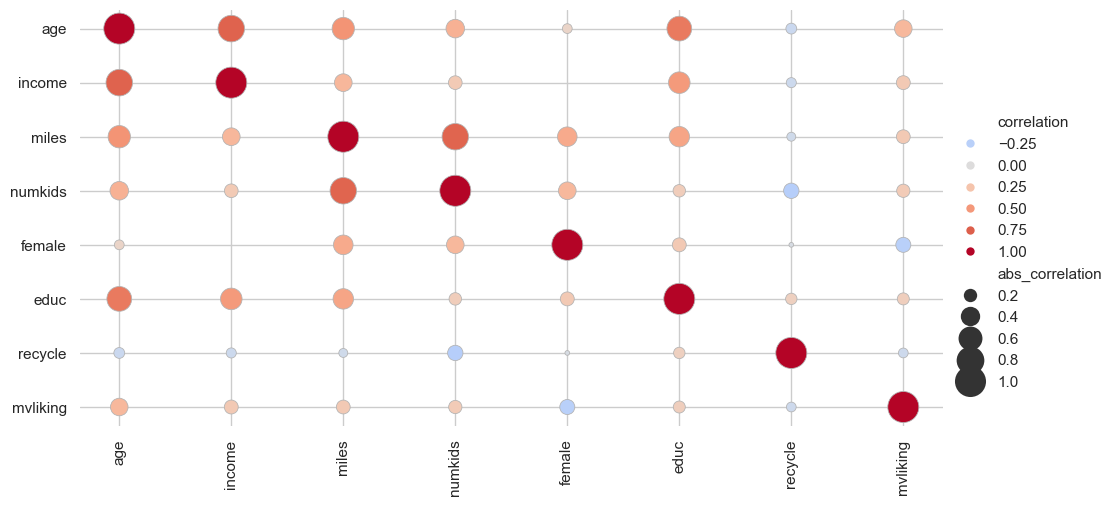

In [40]:
# Heatmap for graphic analysis of Principal Components
sns.set_theme(style="whitegrid")
heatm = sns.relplot(data=dem_corr_HM,
    x="feature_x", y="feature_y", hue="correlation", size="abs_correlation",
    palette="coolwarm", hue_norm=(-1,1), edgecolor=".7", height=5, aspect=2,
    sizes=(0,500),
    )

heatm.set(xlabel="", ylabel="", )
heatm.despine(left=True, bottom=True)
for i in heatm.axes.flat:
    i.set_xticks(i.get_xticks())
    i.set_xticklabels(i.get_xticklabels(), rotation=90)

<Axes: >

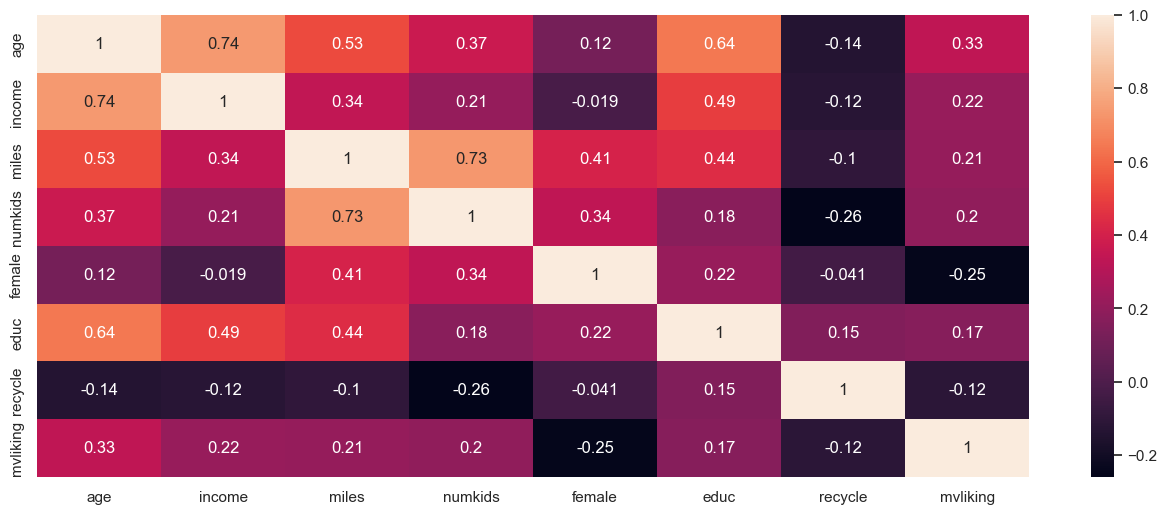

In [41]:
# Same Heatmap, with a different design
plt.figure(figsize=(16,6))
sns.heatmap(data=dem_corr, annot=True)

In [42]:
# From the mvliking column, the "age" feature has the greatest correlation
# Checking the age data division in the dataframe
fig = px.box(data_frame=df_demog, x="age")
fig.show()

In [43]:
# From the mvliking column, the "female" feature has the second greatest correlation
# Checking the data distribution once both "female" and age are filtered
fig = px.box(data_frame=dfcomp.loc[(dfcomp["age"] >= 40) & (dfcomp["female"] == False), :], 
             x="cluster",
             y="mvliking",
             color="cluster")
fig.show()

In [44]:
# % Of male customers above the age of 40
100 * len(dfcomp.loc[(dfcomp["age"] >= 40) & (dfcomp["female"]==0) & (dfcomp["cluster"]==2)]) / len(dfcomp)

8.5

In [45]:
df_kcentroid

,VacationlessCheapskate,Small&New,FamilyGuy,FastnFurious,HighEnd
0,4.82,0.17,0.26,0.08,0.04
1,-2.91,-3.73,-0.33,-0.13,-0.14
2,-3.49,3.91,0.00,0.03,0.10


<h1 style="color:cornflowerblue">Conclusion</h1>
<p>Using PCA the number of features decreased, allowing to simplify the questions needed to be answered.</p>
<p>It was possible to separate the customer base in clusters and identify witch was more inclined to buy the new vehicle.</p>
<p>By uniting that and the demographic information, it is possible to understand that marketing campaigns mus be focused on the male customers, with age of 40/45, that is not exactaly worried about the money spent, and rather have a bigger car.</p>